<a href="https://colab.research.google.com/github/AndreiAf02/STAT561_Project/blob/main/STAT561_Fine_Tuning_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import seaborn as sns
import pandas as pd

In [2]:
path_to_data = 'https://raw.githubusercontent.com/AndreiAf02/STAT561_Project/main/'

In [3]:
def perf_metrics(data, label):
    data_len = len(data)
    # print('Number of iterations:', data_len)
    mean = np.mean(data[label])
    var = np.var(data[label], ddof=1)
    var_mean = var/data_len

    se_mean = np.sqrt(var_mean)
    error_bound = 1.96*se_mean
    CI_low = mean - error_bound
    CI_high = mean + error_bound

    print('Error type:', label)
    print('Mean:', mean)
    print('Variance:', var)
    print('Variance of estimate:', var_mean)
    print('Standard error:', se_mean)
    print('95% Confidence Interval:  [', CI_low, ', ', CI_high, ']')
    print('-----------------------------')


Loading the performance data for the six sampling methods (plus original imbalanced data) collected from fine-tuning for heart disease prediction:

In [73]:
data_orig = pd.read_csv(path_to_data + "Imbalanced_Fine_Tuning.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data + "SRS_Fine_Tuning.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data + "SRSwR_Fine_Tuning.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data + "Sy_Fine_Tuning.csv", sep=",", header=0)
data_Sym = pd.read_csv(path_to_data + "Sy_multi_Fine_Tuning.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data + "SRS_ROS_Fine_Tuning.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data + "Sy_ROS_Fine_Tuning.csv", sep=",", header=0)


# data_orig

Original (imbalanced) data performance:

In [88]:
data_orig

,Unnamed: 0,FPR,FNR
0,0,0.000000,1.000000
1,1,0.000000,1.000000
2,2,0.000000,1.000000
3,3,0.000000,1.000000
4,4,0.000000,1.000000
5,5,0.000000,1.000000
6,6,0.000000,0.997831
7,7,0.000000,1.000000
8,8,0.000000,1.000000
9,9,0.000000,1.000000


Error type: FPR
Mean: 0.00016681299385423802
Variance: 9.352082531017528e-08
Variance of estimate: 1.8704165062035055e-09
Standard error: 4.324831217751168e-05
95% Confidence Interval:  [ 8.204630198631513e-05 ,  0.0002515796857221609 ]
-----------------------------
Error type: FNR
Mean: 0.9990889370932754
Variance: 1.7458058646594462e-06
Variance of estimate: 3.491611729318893e-08
Standard error: 0.00018685854888976562
95% Confidence Interval:  [ 0.9987226943374514 ,  0.9994551798490994 ]
-----------------------------


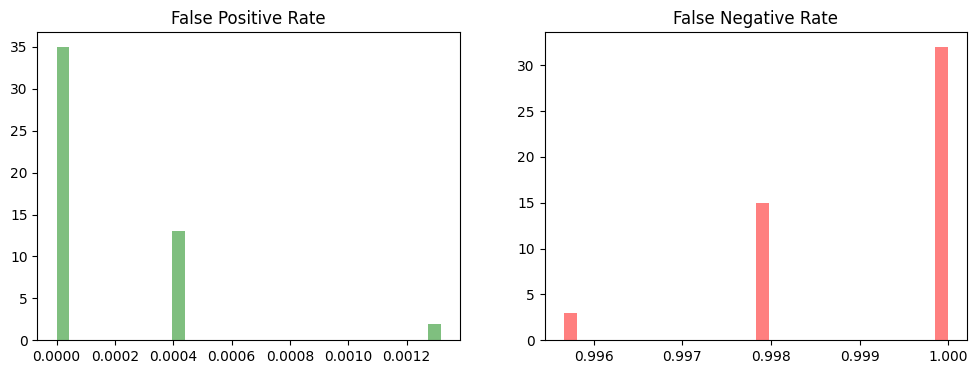

In [75]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Undersampling (RUS):

SRS Random Undersampling performance:

Error type: FPR
Mean: 0.21179982440737485
Variance: 0.0016176368729977288
Variance of estimate: 3.235273745995458e-05
Standard error: 0.005687946682235566
95% Confidence Interval:  [ 0.20065144891019315 ,  0.22294819990455655 ]
-----------------------------
Error type: FNR
Mean: 0.4595661605206074
Variance: 0.0040226536076290766
Variance of estimate: 8.045307215258153e-05
Standard error: 0.008969563654525316
95% Confidence Interval:  [ 0.44198581575773777 ,  0.477146505283477 ]
-----------------------------


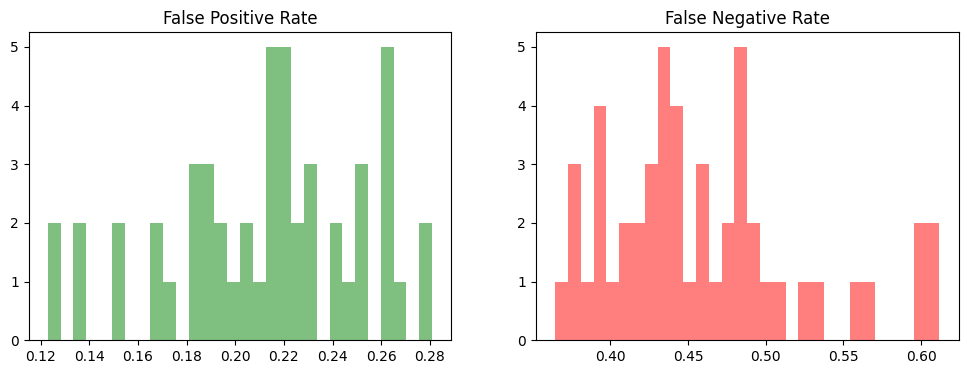

In [76]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

SRSwR undersampling performance:

Error type: FPR
Mean: 0.17845478489903419
Variance: 0.004170299204818144
Variance of estimate: 8.340598409636288e-05
Standard error: 0.00913268767101793
95% Confidence Interval:  [ 0.16055471706383906 ,  0.1963548527342293 ]
-----------------------------
Error type: FNR
Mean: 0.5837310195227766
Variance: 0.01362981751911384
Variance of estimate: 0.0002725963503822768
Standard error: 0.01651049213022667
95% Confidence Interval:  [ 0.5513704549475323 ,  0.6160915840980209 ]
-----------------------------


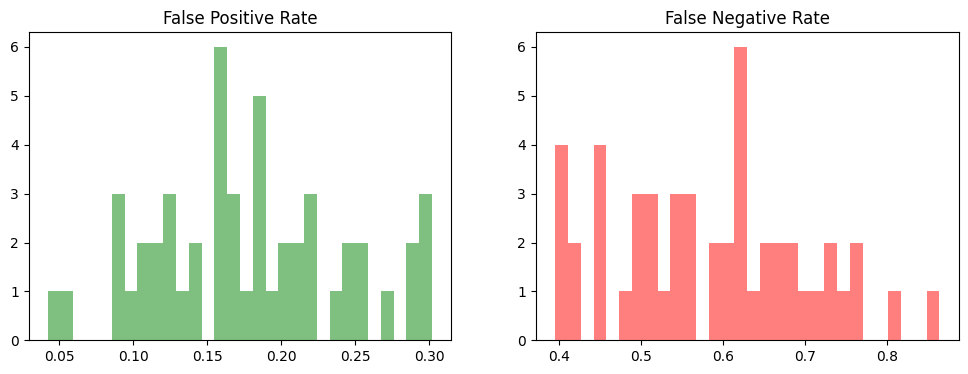

In [77]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.15562774363476728
Variance: 0.0017016876332386634
Variance of estimate: 3.403375266477327e-05
Standard error: 0.005833845444025173
95% Confidence Interval:  [ 0.14419340656447793 ,  0.16706208070505663 ]
-----------------------------
Error type: FNR
Mean: 0.6618655097613884
Variance: 0.005241573725871412
Variance of estimate: 0.00010483147451742824
Standard error: 0.010238724262203189
95% Confidence Interval:  [ 0.6417976102074701 ,  0.6819334093153067 ]
-----------------------------


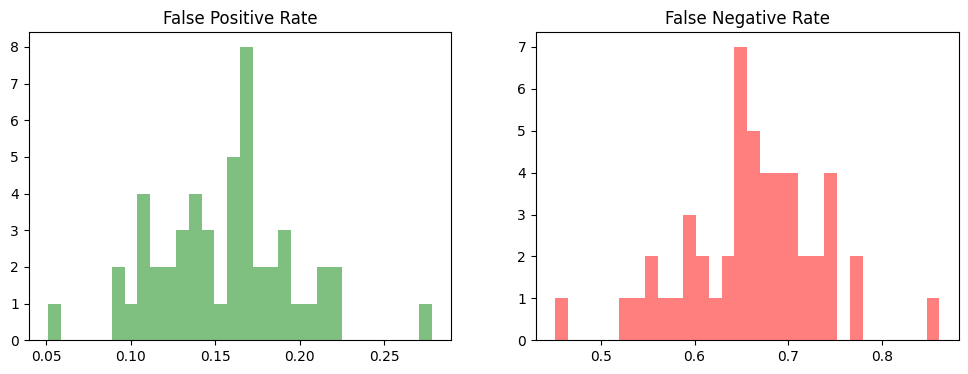

In [78]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Multiple Systematic undersampling performance:

Error type: FPR
Mean: 0.18863037752414397
Variance: 0.002778852555003892
Variance of estimate: 5.557705110007784e-05
Standard error: 0.007455001750508033
95% Confidence Interval:  [ 0.17401857409314822 ,  0.2032421809551397 ]
-----------------------------
Error type: FNR
Mean: 0.4996963123644251
Variance: 0.006523967043256905
Variance of estimate: 0.0001304793408651381
Standard error: 0.011422755397238362
95% Confidence Interval:  [ 0.47730771178583786 ,  0.5220849129430123 ]
-----------------------------


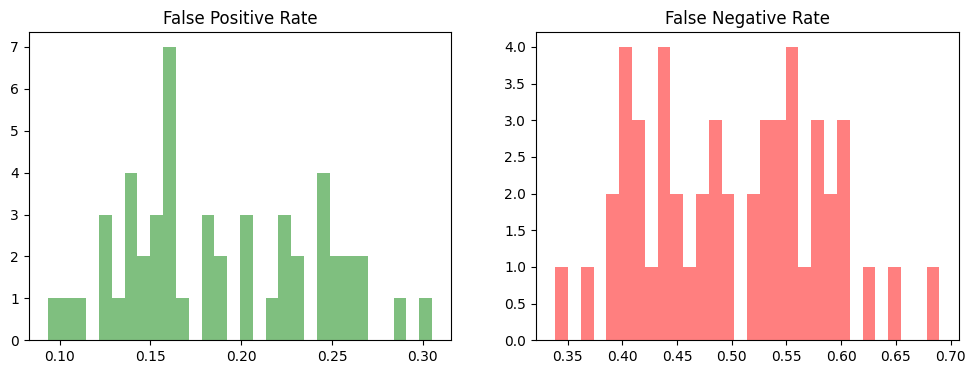

In [79]:
data = data_Sym

Sym_FPR = data['FPR']
Sym_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.1992098331870061
Variance: 0.0010257087254332236
Variance of estimate: 2.0514174508664474e-05
Standard error: 0.004529257611205668
95% Confidence Interval:  [ 0.190332488269043 ,  0.2080871781049692 ]
-----------------------------
Error type: FNR
Mean: 0.5025596529284164
Variance: 0.0028327457483433354
Variance of estimate: 5.665491496686671e-05
Standard error: 0.00752694592559736
95% Confidence Interval:  [ 0.4878068389142456 ,  0.5173124669425873 ]
-----------------------------


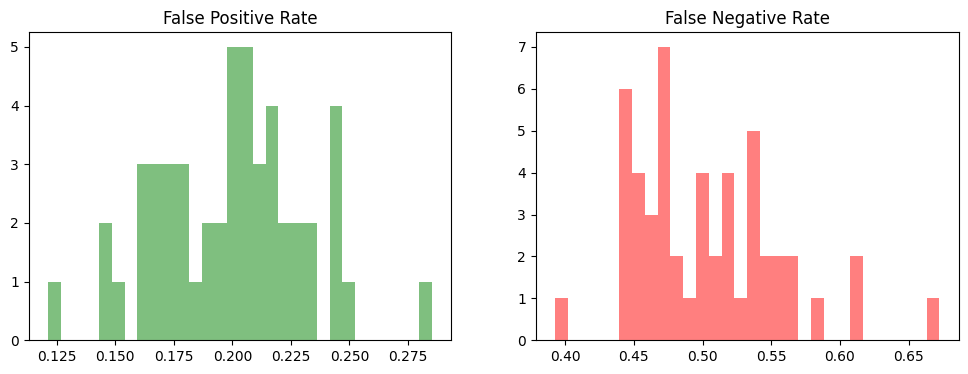

In [80]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Resampling performance:

Error type: FPR
Mean: 0.16856014047410003
Variance: 0.0023468495807112974
Variance of estimate: 4.693699161422595e-05
Standard error: 0.006851057700401154
95% Confidence Interval:  [ 0.15513206738131377 ,  0.1819882135668863 ]
-----------------------------
Error type: FNR
Mean: 0.6095010845986985
Variance: 0.007719859425176615
Variance of estimate: 0.0001543971885035323
Standard error: 0.012425666521500258
95% Confidence Interval:  [ 0.5851467782165579 ,  0.633855390980839 ]
-----------------------------


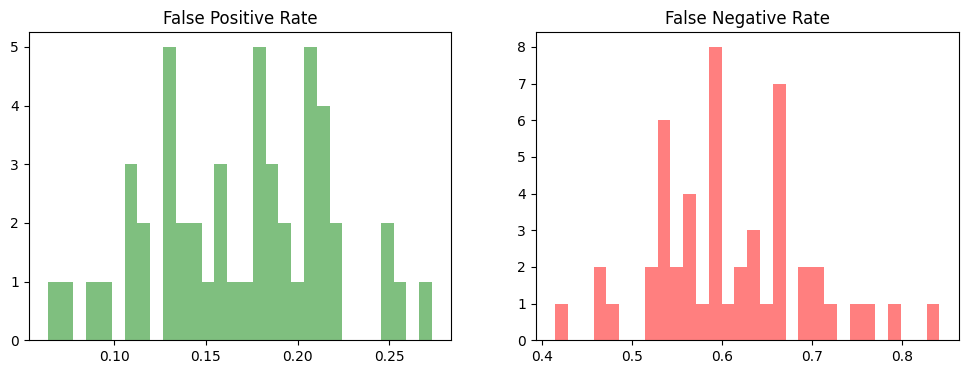

In [81]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

In [82]:
FPR = pd.DataFrame()

DF = FPR

DF['Orig'] = orig_FPR
DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sym_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR

<Axes: title={'center': 'FPR'}>

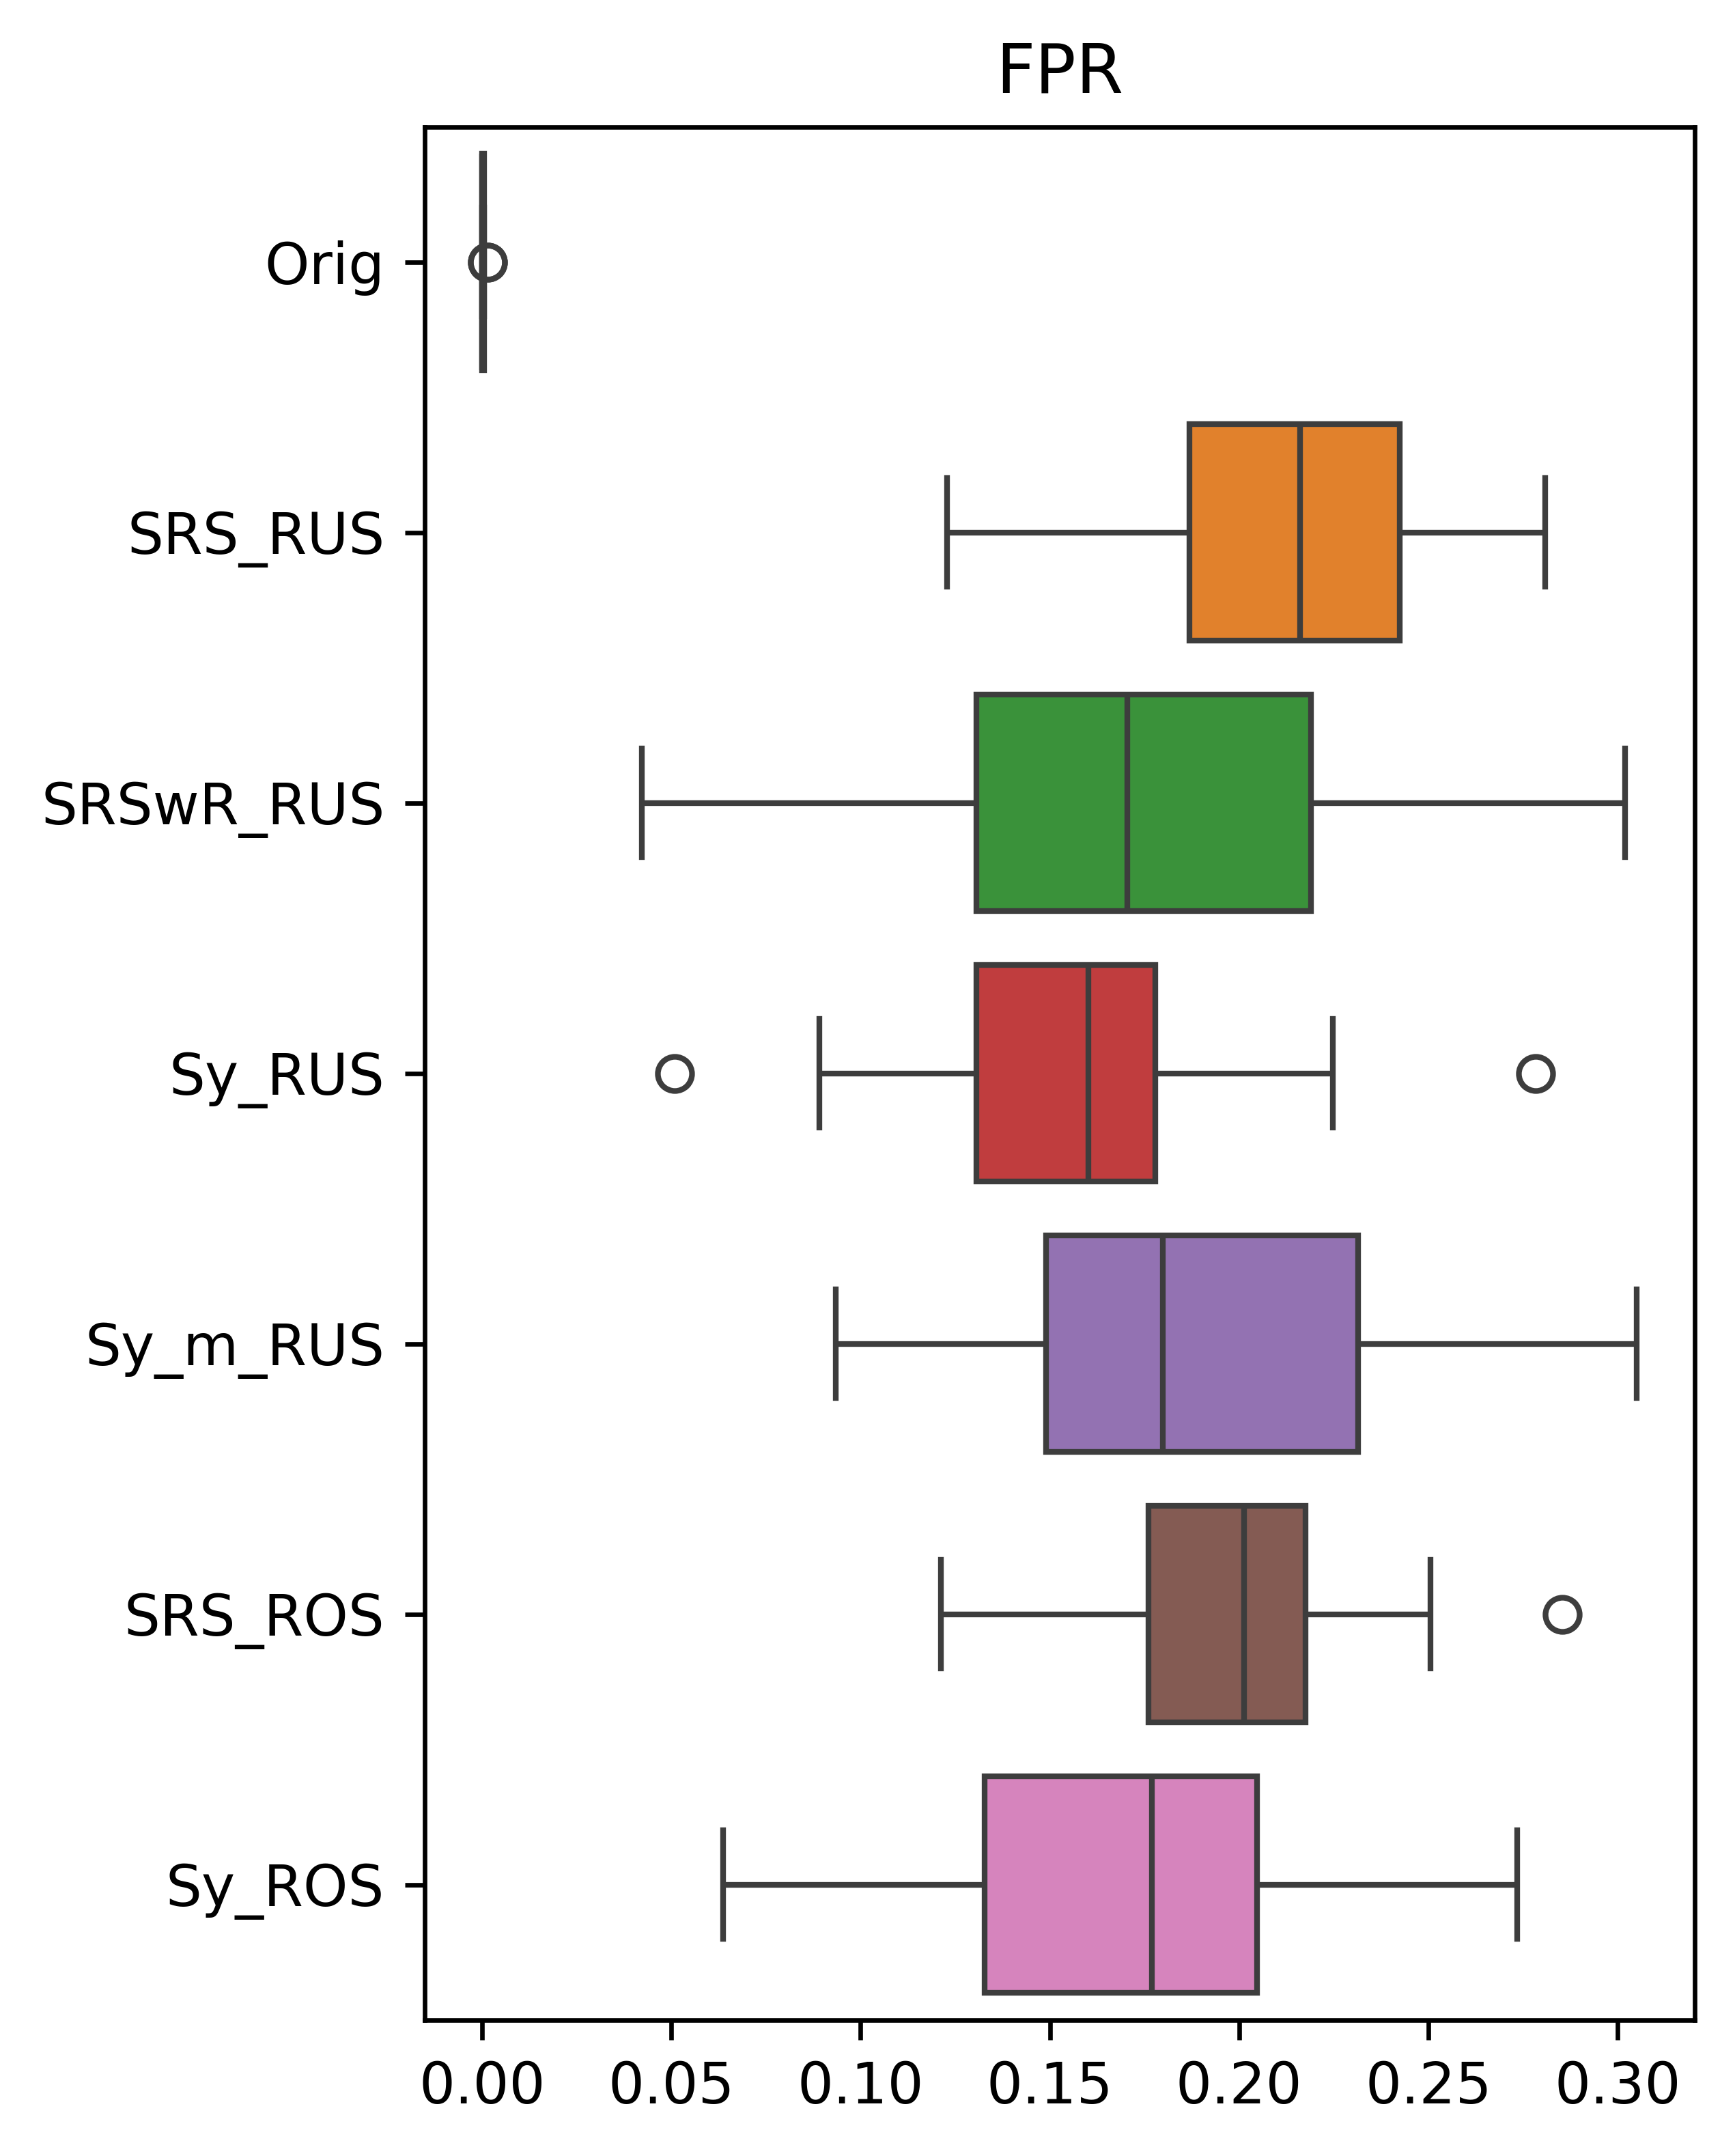

In [84]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [85]:
FNR = pd.DataFrame()

DF = FNR

DF['Orig'] = orig_FNR
DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sym_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR

<Axes: title={'center': 'FNR'}>

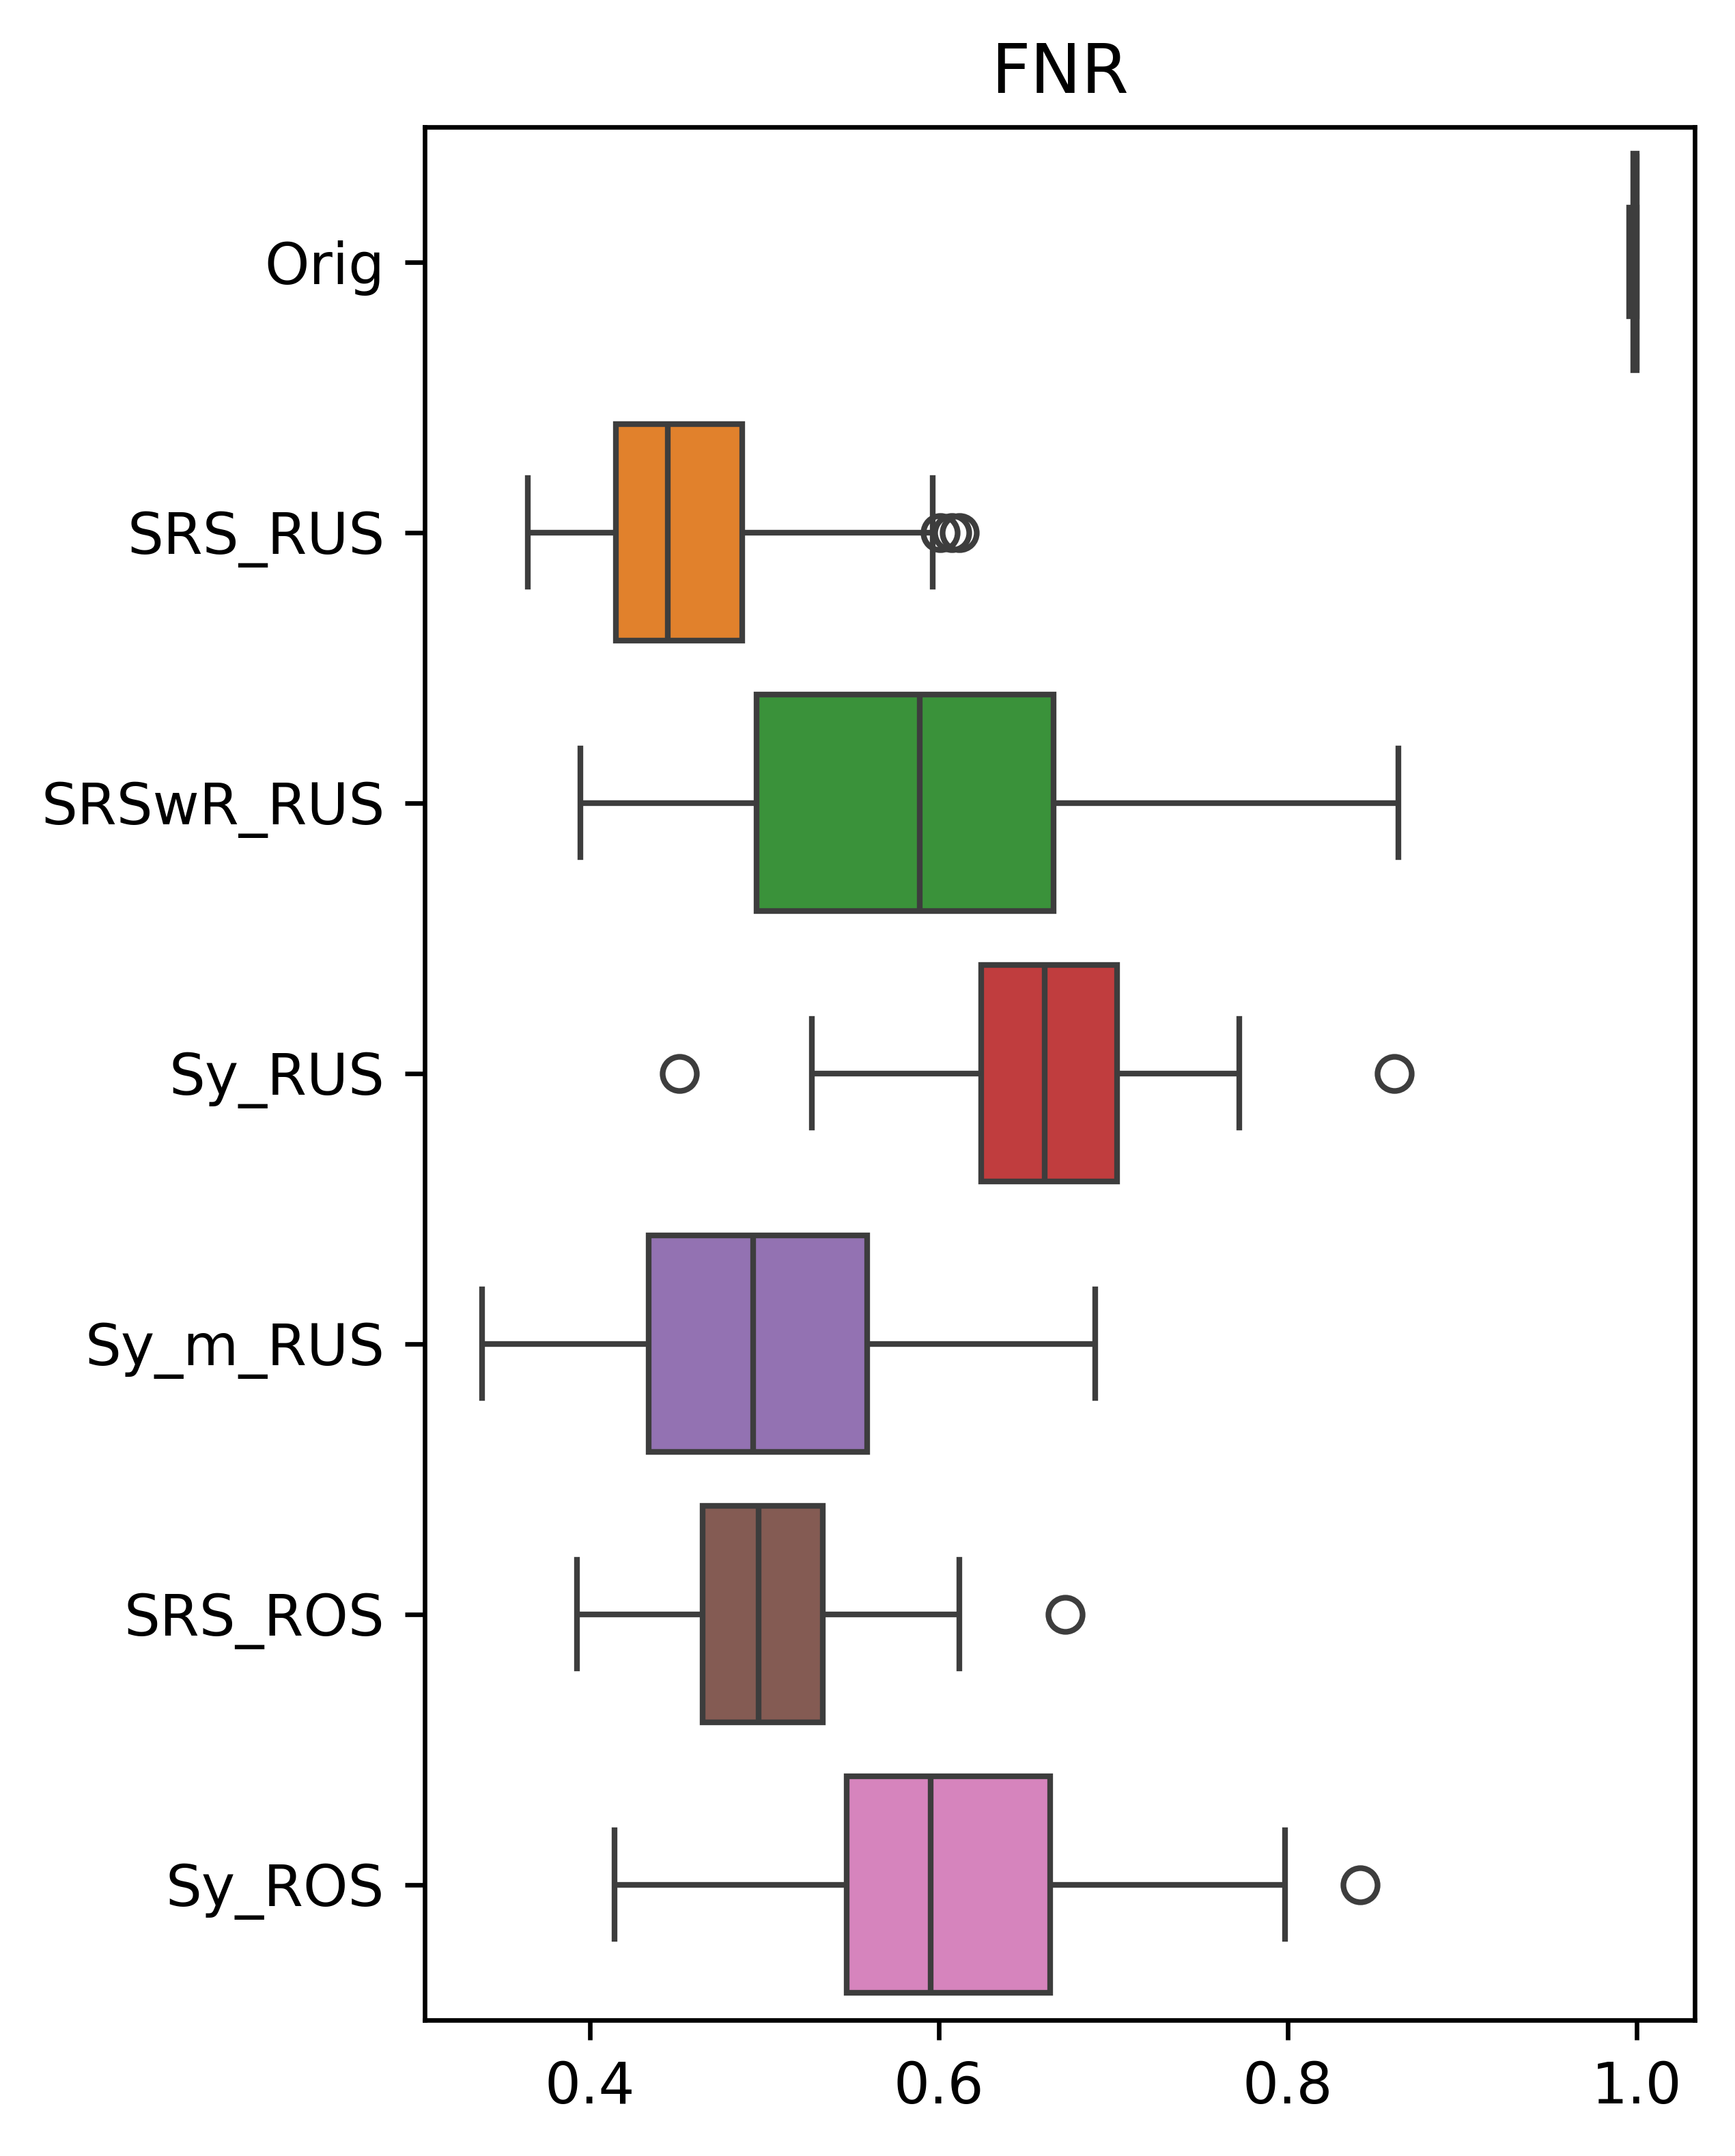

In [87]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

## Transductive TL performance:

In [89]:
data_orig = pd.read_csv(path_to_data + "Imbalanced_Extended.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data + "SRS_RUS_Extended.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data + "SRSwR_RUS_Extended.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data + "Sy_RUS_Extended.csv", sep=",", header=0)
data_Sy2 = pd.read_csv(path_to_data + "Sy2_RUS_Extended.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data + "SRS_ROS_Extended.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data + "Sy_ROS_Extended.csv", sep=",", header=0)
data_SRS

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,38.182653,0.620355,0.379645,0.073171,0.926829,0.392217
1,1,39.117342,0.605290,0.394710,0.072358,0.927642,0.398235
2,2,33.653508,0.620690,0.379310,0.069106,0.930894,0.396149
3,3,31.903510,0.548042,0.451958,0.104878,0.895122,0.321974
4,4,50.133427,0.621694,0.378306,0.071545,0.928455,0.394950
...,...,...,...,...,...,...,...
65,65,50.390452,0.645129,0.354871,0.059350,0.940650,0.407651
66,66,53.315144,0.572481,0.427519,0.091057,0.908943,0.348805
67,67,48.622430,0.620020,0.379980,0.078862,0.921138,0.411389
68,68,45.796219,0.568463,0.431537,0.092683,0.907317,0.329012


Original (imbalanced) dataset:

In [13]:
orig_FPR = data_orig['FPR']
orig_FNR = data_orig['FNR']
orig_time = data_orig['Source time']


Error type: FPR
Mean: 0.056431201880000004
Variance: 0.0003086563460579054
Variance of estimate: 6.173126921158108e-06
Standard error: 0.0024845778154765265
95% Confidence Interval:  [ 0.05156142936166601 ,  0.061300974398334 ]
-----------------------------
Error type: FNR
Mean: 0.7798211382400001
Variance: 0.0030638735413488403
Variance of estimate: 6.12774708269768e-05
Standard error: 0.007827992771264981
95% Confidence Interval:  [ 0.7644782724083208 ,  0.7951640040716794 ]
-----------------------------
Error type: Source time
Mean: 159.317669926
Variance: 307.5208710074591
Variance of estimate: 6.150417420149182
Standard error: 2.480003512124364
95% Confidence Interval:  [ 154.45686304223625 ,  164.17847680976377 ]
-----------------------------


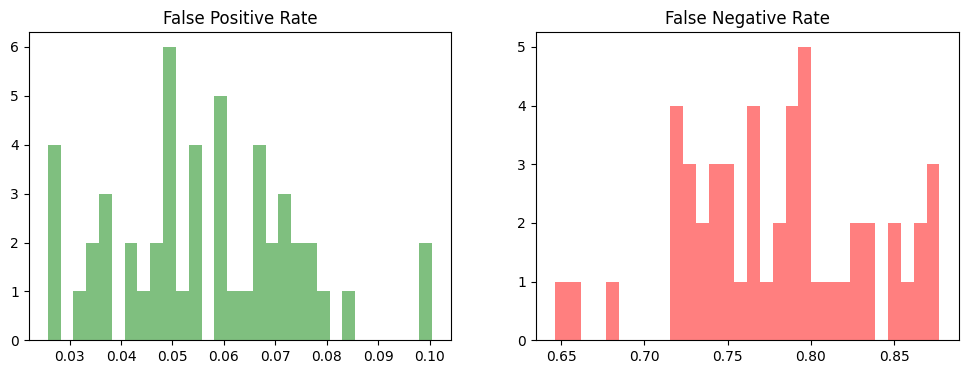

In [5]:
data = data_orig

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

##Random Undersampling (RUS):

SRS undersampling performance:

Error type: FPR
Mean: 0.6194031277999998
Variance: 0.0018574791678661036
Variance of estimate: 2.653541668380148e-05
Standard error: 0.0051512538943252915
95% Confidence Interval:  [ 0.6093066701671223 ,  0.6294995854328774 ]
-----------------------------
Error type: FNR
Mean: 0.07498257845714287
Variance: 0.0003162210119446578
Variance of estimate: 4.517443027780826e-06
Standard error: 0.002125427728195157
95% Confidence Interval:  [ 0.07081674010988037 ,  0.07914841680440537 ]
-----------------------------
Error type: Source time
Mean: 42.97201582171428
Variance: 63.13419901209541
Variance of estimate: 0.9019171287442201
Standard error: 0.9496931761070099
95% Confidence Interval:  [ 41.11061719654454 ,  44.83341444688402 ]
-----------------------------


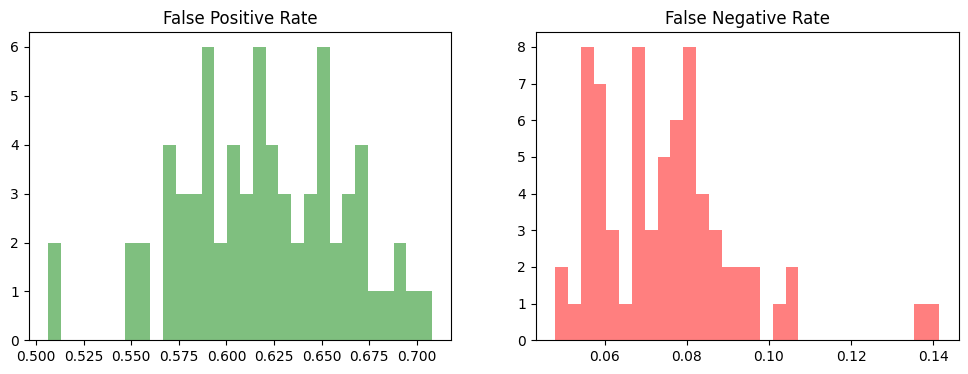

In [14]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']
SRS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

SRSwR Undersampling performance:

Error type: FPR
Mean: 0.6248457601428572
Variance: 0.0017181481840738253
Variance of estimate: 2.4544974058197505e-05
Standard error: 0.004954288451250846
95% Confidence Interval:  [ 0.6151353547784055 ,  0.6345561655073089 ]
-----------------------------
Error type: FNR
Mean: 0.0732288037
Variance: 0.00028913319178511325
Variance of estimate: 4.130474168358761e-06
Standard error: 0.002032356801439836
95% Confidence Interval:  [ 0.06924538436917792 ,  0.07721222303082208 ]
-----------------------------
Error type: Source time
Mean: 45.01086710671429
Variance: 22.724342551462428
Variance of estimate: 0.3246334650208918
Standard error: 0.5697661494164881
95% Confidence Interval:  [ 43.89412545385797 ,  46.127608759570606 ]
-----------------------------


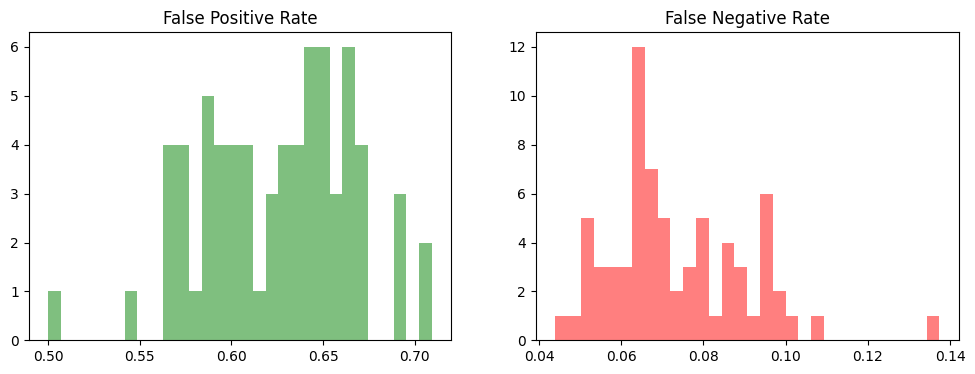

In [15]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']
SRSwR_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.6338227557571428
Variance: 0.0013414888764044597
Variance of estimate: 1.9164126805777997e-05
Standard error: 0.004377685096689573
95% Confidence Interval:  [ 0.6252424929676312 ,  0.6424030185466543 ]
-----------------------------
Error type: FNR
Mean: 0.06927990711428571
Variance: 0.00019135708954984374
Variance of estimate: 2.7336727078549107e-06
Standard error: 0.0016533822025940979
95% Confidence Interval:  [ 0.06603927799720127 ,  0.07252053623137014 ]
-----------------------------
Error type: Source time
Mean: 50.56252305785714
Variance: 25.09248868041457
Variance of estimate: 0.3584641240059224
Standard error: 0.5987187353055877
95% Confidence Interval:  [ 49.38903433665819 ,  51.73601177905609 ]
-----------------------------


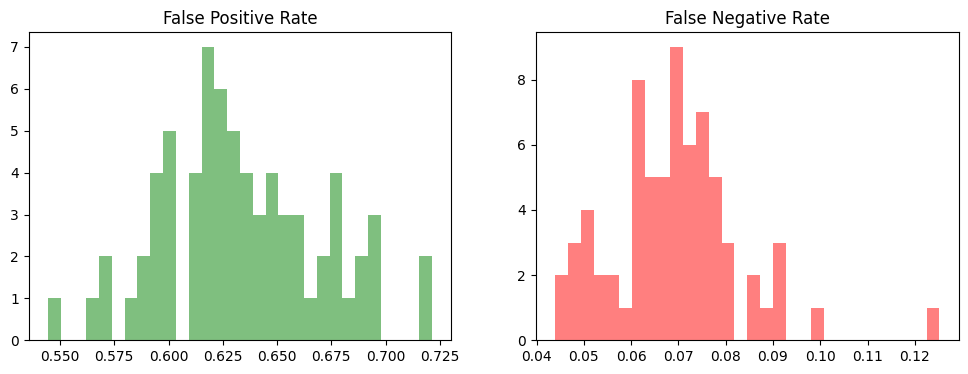

In [16]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']
Sy_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Multiple Systematic Undersampling performance:

Error type: FPR
Mean: 0.62630733176
Variance: 0.001436624638880123
Variance of estimate: 2.8732492777602457e-05
Standard error: 0.005360269841864536
95% Confidence Interval:  [ 0.6158012028699454 ,  0.6368134606500545 ]
-----------------------------
Error type: FNR
Mean: 0.07328455292
Variance: 0.0002638266003123831
Variance of estimate: 5.276532006247661e-06
Standard error: 0.002297070309382728
95% Confidence Interval:  [ 0.06878229511360985 ,  0.07778681072639014 ]
-----------------------------
Error type: Source time
Mean: 46.968267809599986
Variance: 16.49233547378666
Variance of estimate: 0.3298467094757332
Standard error: 0.57432282688026
95% Confidence Interval:  [ 45.842595068914676 ,  48.093940550285296 ]
-----------------------------


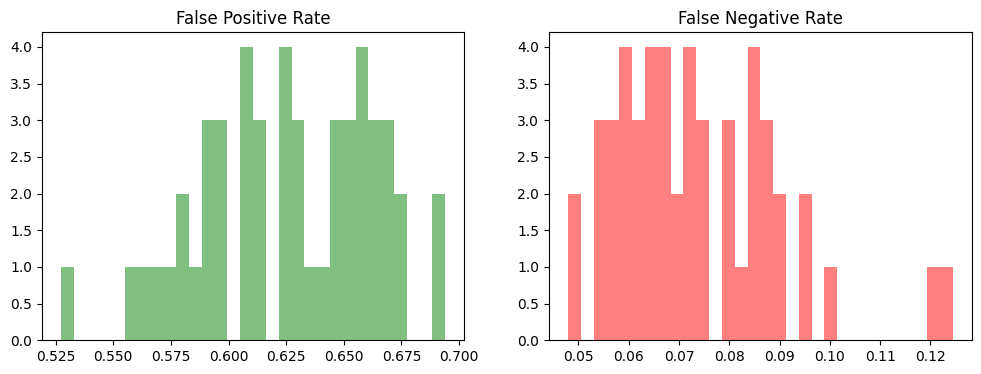

In [17]:
data = data_Sy2

Sy2_FPR = data['FPR']
Sy2_FNR = data['FNR']
Sy2_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.6194174756999999
Variance: 0.0009440872651663789
Variance of estimate: 1.888174530332758e-05
Standard error: 0.0043453130270818905
95% Confidence Interval:  [ 0.6109006621669194 ,  0.6279342892330805 ]
-----------------------------
Error type: FNR
Mean: 0.07492682928000001
Variance: 0.00016876251993279038
Variance of estimate: 3.3752503986558076e-06
Standard error: 0.0018371854557054951
95% Confidence Interval:  [ 0.07132594578681724 ,  0.07852771277318278 ]
-----------------------------
Error type: Source time
Mean: 231.34685063799995
Variance: 1063.2549223460182
Variance of estimate: 21.265098446920366
Standard error: 4.611409594356195
95% Confidence Interval:  [ 222.3084878330618 ,  240.3852134429381 ]
-----------------------------


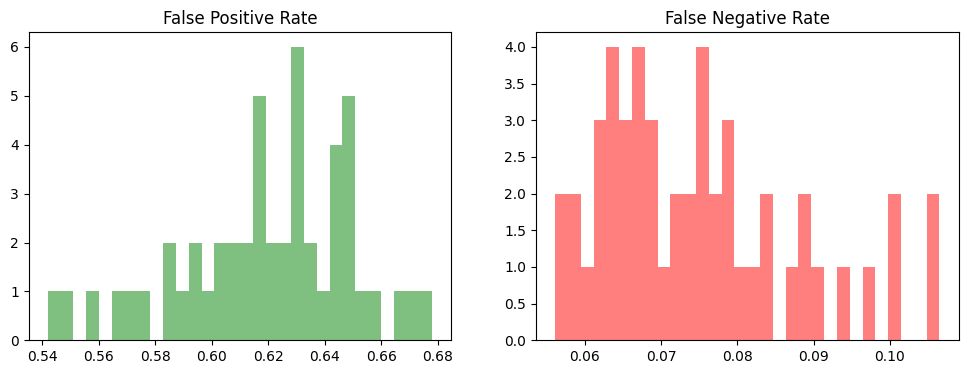

In [18]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']
SRS_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Resampling performance:

Error type: FPR
Mean: 0.61440408445
Variance: 0.0008823741963185772
Variance of estimate: 2.205935490796443e-05
Standard error: 0.004696738752364712
95% Confidence Interval:  [ 0.6051984764953652 ,  0.6236096924046349 ]
-----------------------------
Error type: FNR
Mean: 0.077296748025
Variance: 0.00014149722823911798
Variance of estimate: 3.5374307059779496e-06
Standard error: 0.0018808058661057897
95% Confidence Interval:  [ 0.07361036852743265 ,  0.08098312752256735 ]
-----------------------------
Error type: Source time
Mean: 216.4440234375
Variance: 544.9687180247095
Variance of estimate: 13.624217950617737
Standard error: 3.6910998294028485
95% Confidence Interval:  [ 209.2094677718704 ,  223.67857910312958 ]
-----------------------------


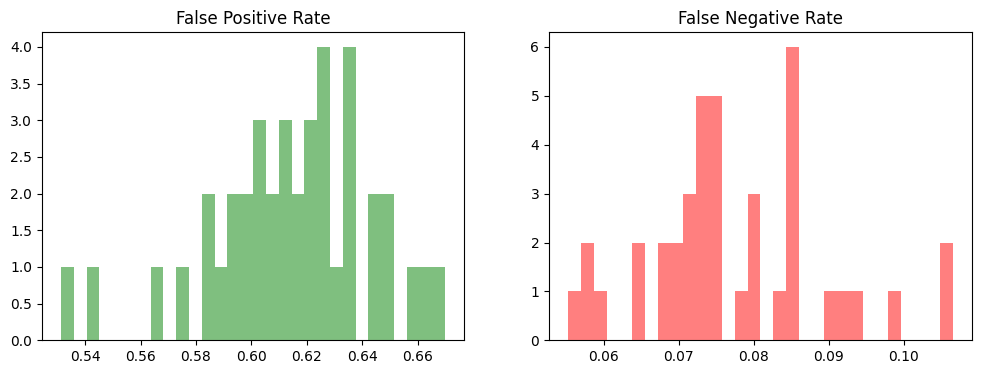

In [19]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']
Sy_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

In [69]:
FPR = pd.DataFrame()

DF = FPR

DF['Orig'] = orig_FPR
DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sy2_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR

<Axes: title={'center': 'FPR'}>

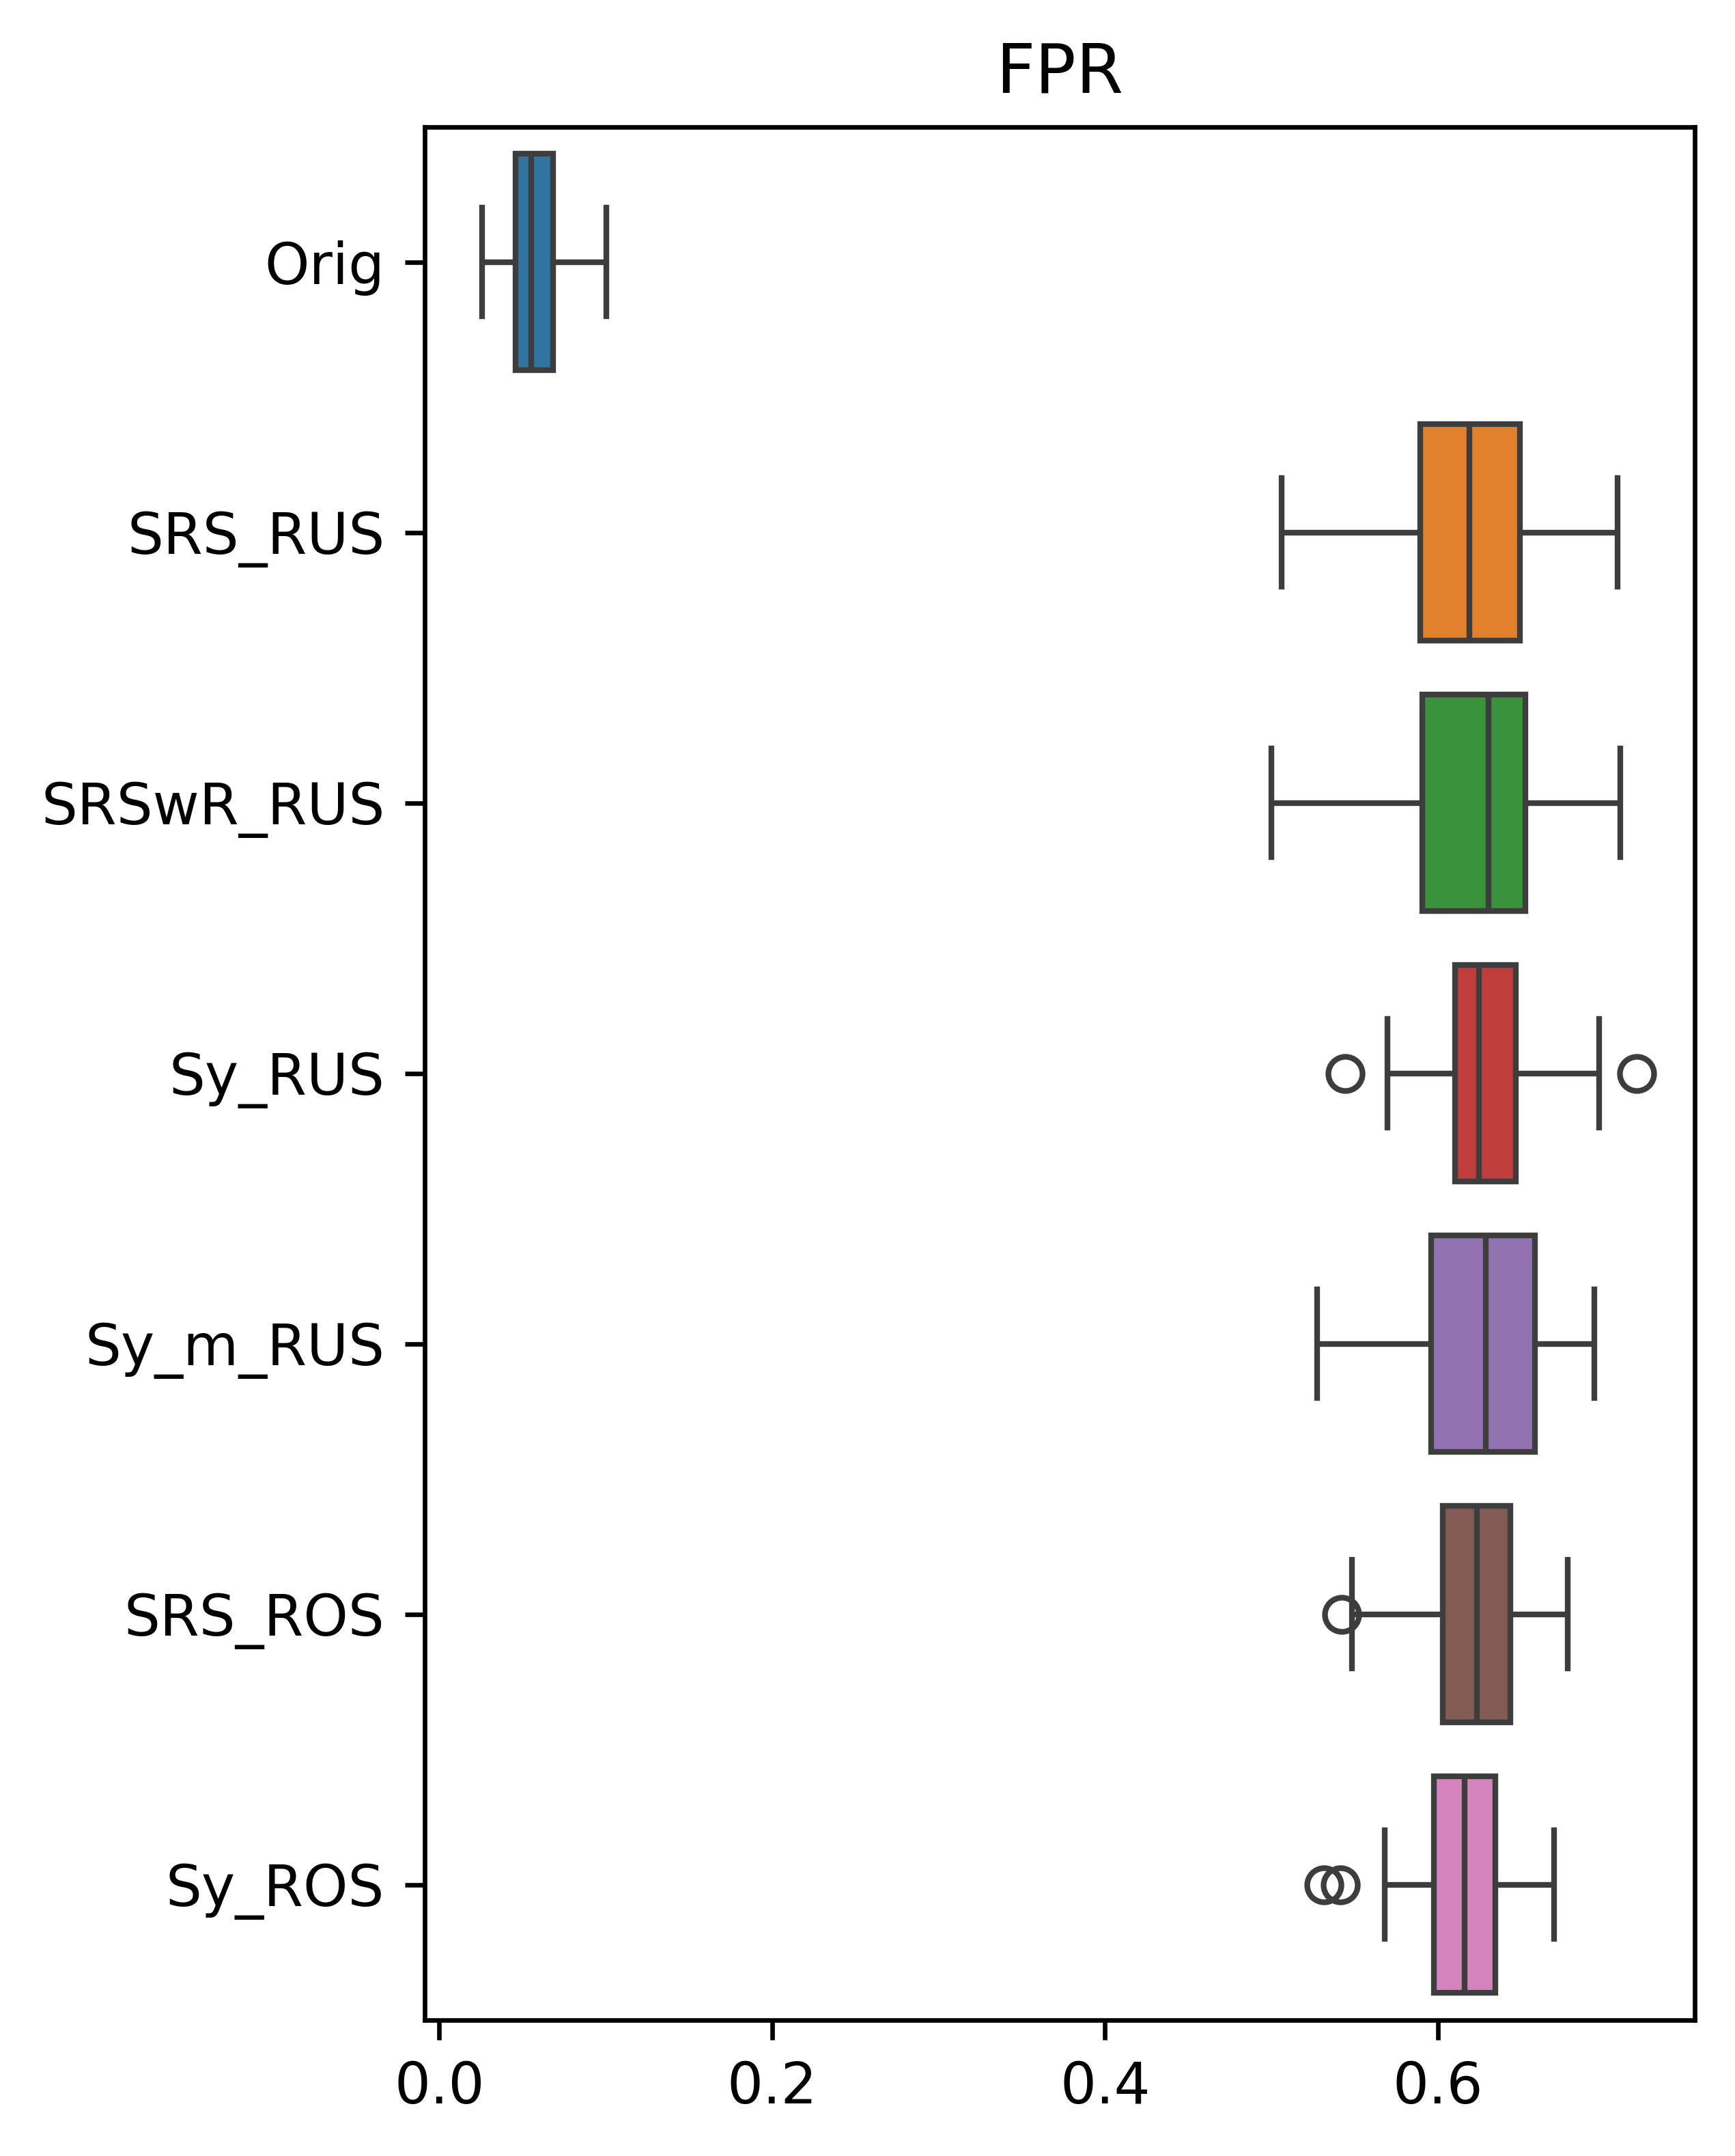

In [70]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [71]:
FNR = pd.DataFrame()

DF = FNR

DF['Orig'] = orig_FNR
DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sy2_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR

<Axes: title={'center': 'FNR'}>

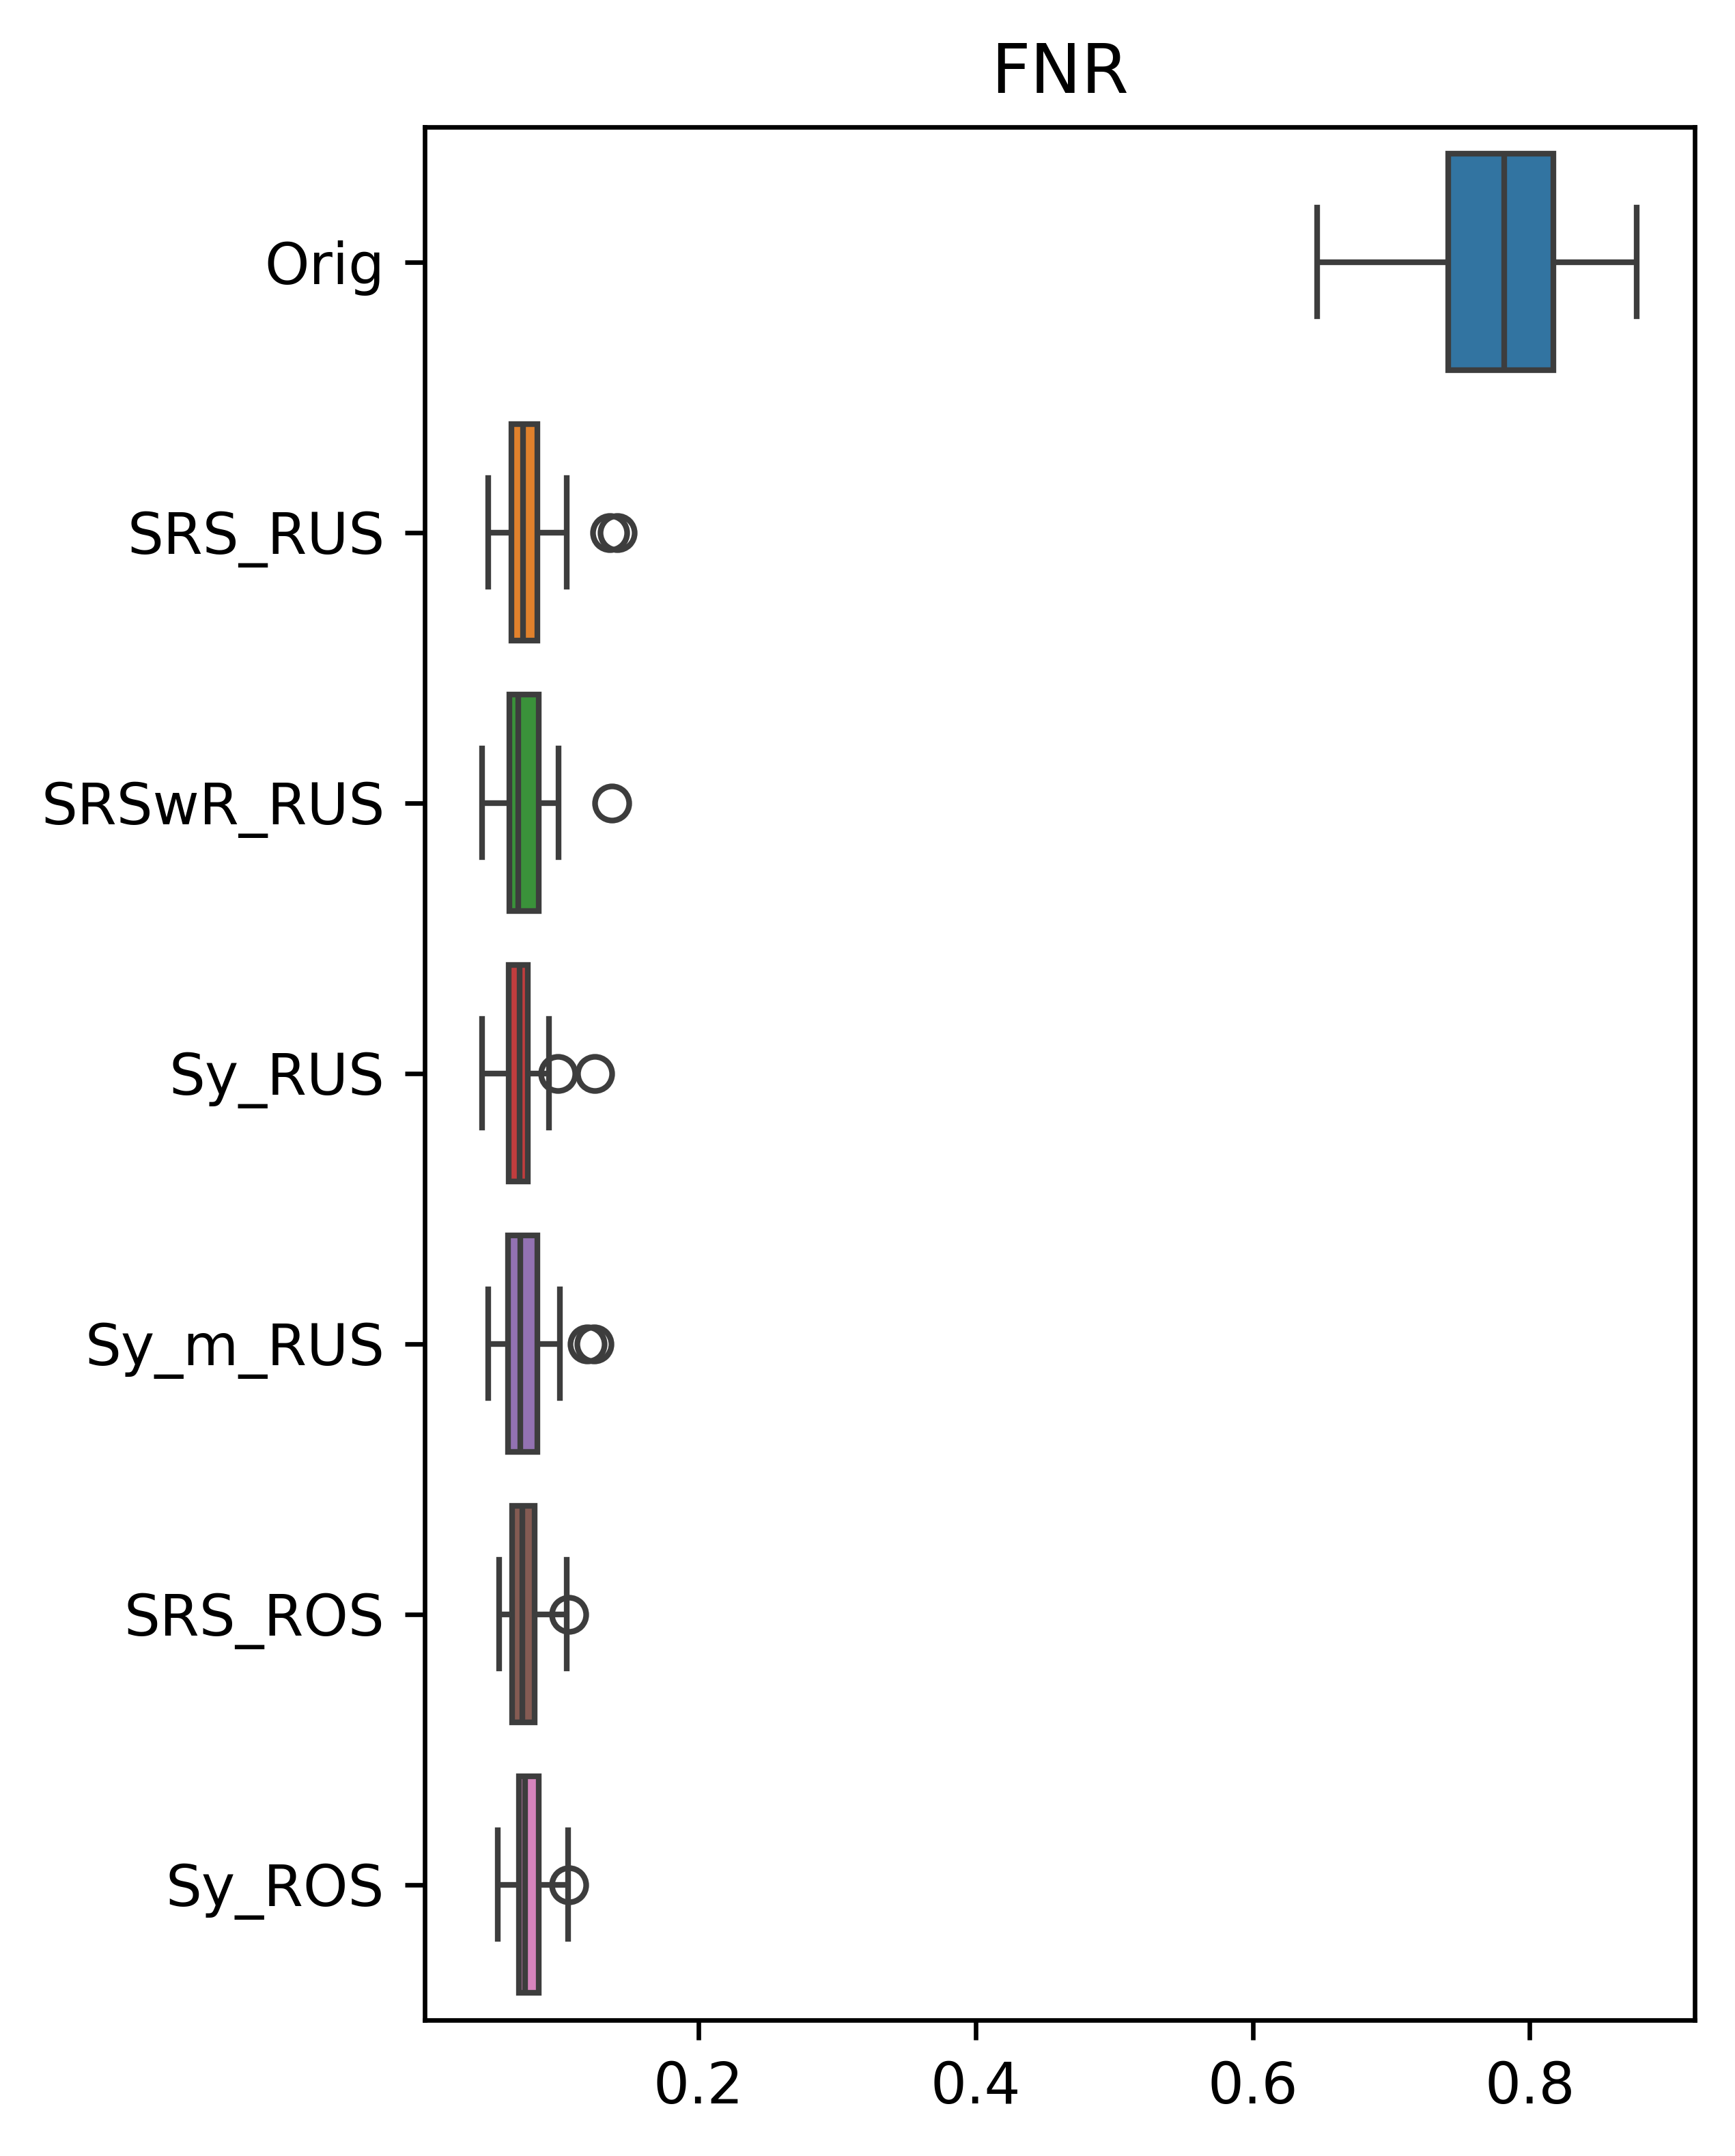

In [72]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [59]:
Time = pd.DataFrame()

DF = FNR

DF['Orig'] = orig_time
DF['SRS_RUS'] = SRS_time
DF['SRSwR_RUS'] = SRSwR_time
DF['Sy_RUS'] = Sy_time
DF['Sy_m_RUS'] = Sy2_time
DF['SRS_ROS'] = SRS_ROS_time
DF['Sy_ROS'] = Sy_ROS_time

<Axes: title={'center': 'Training Time'}>

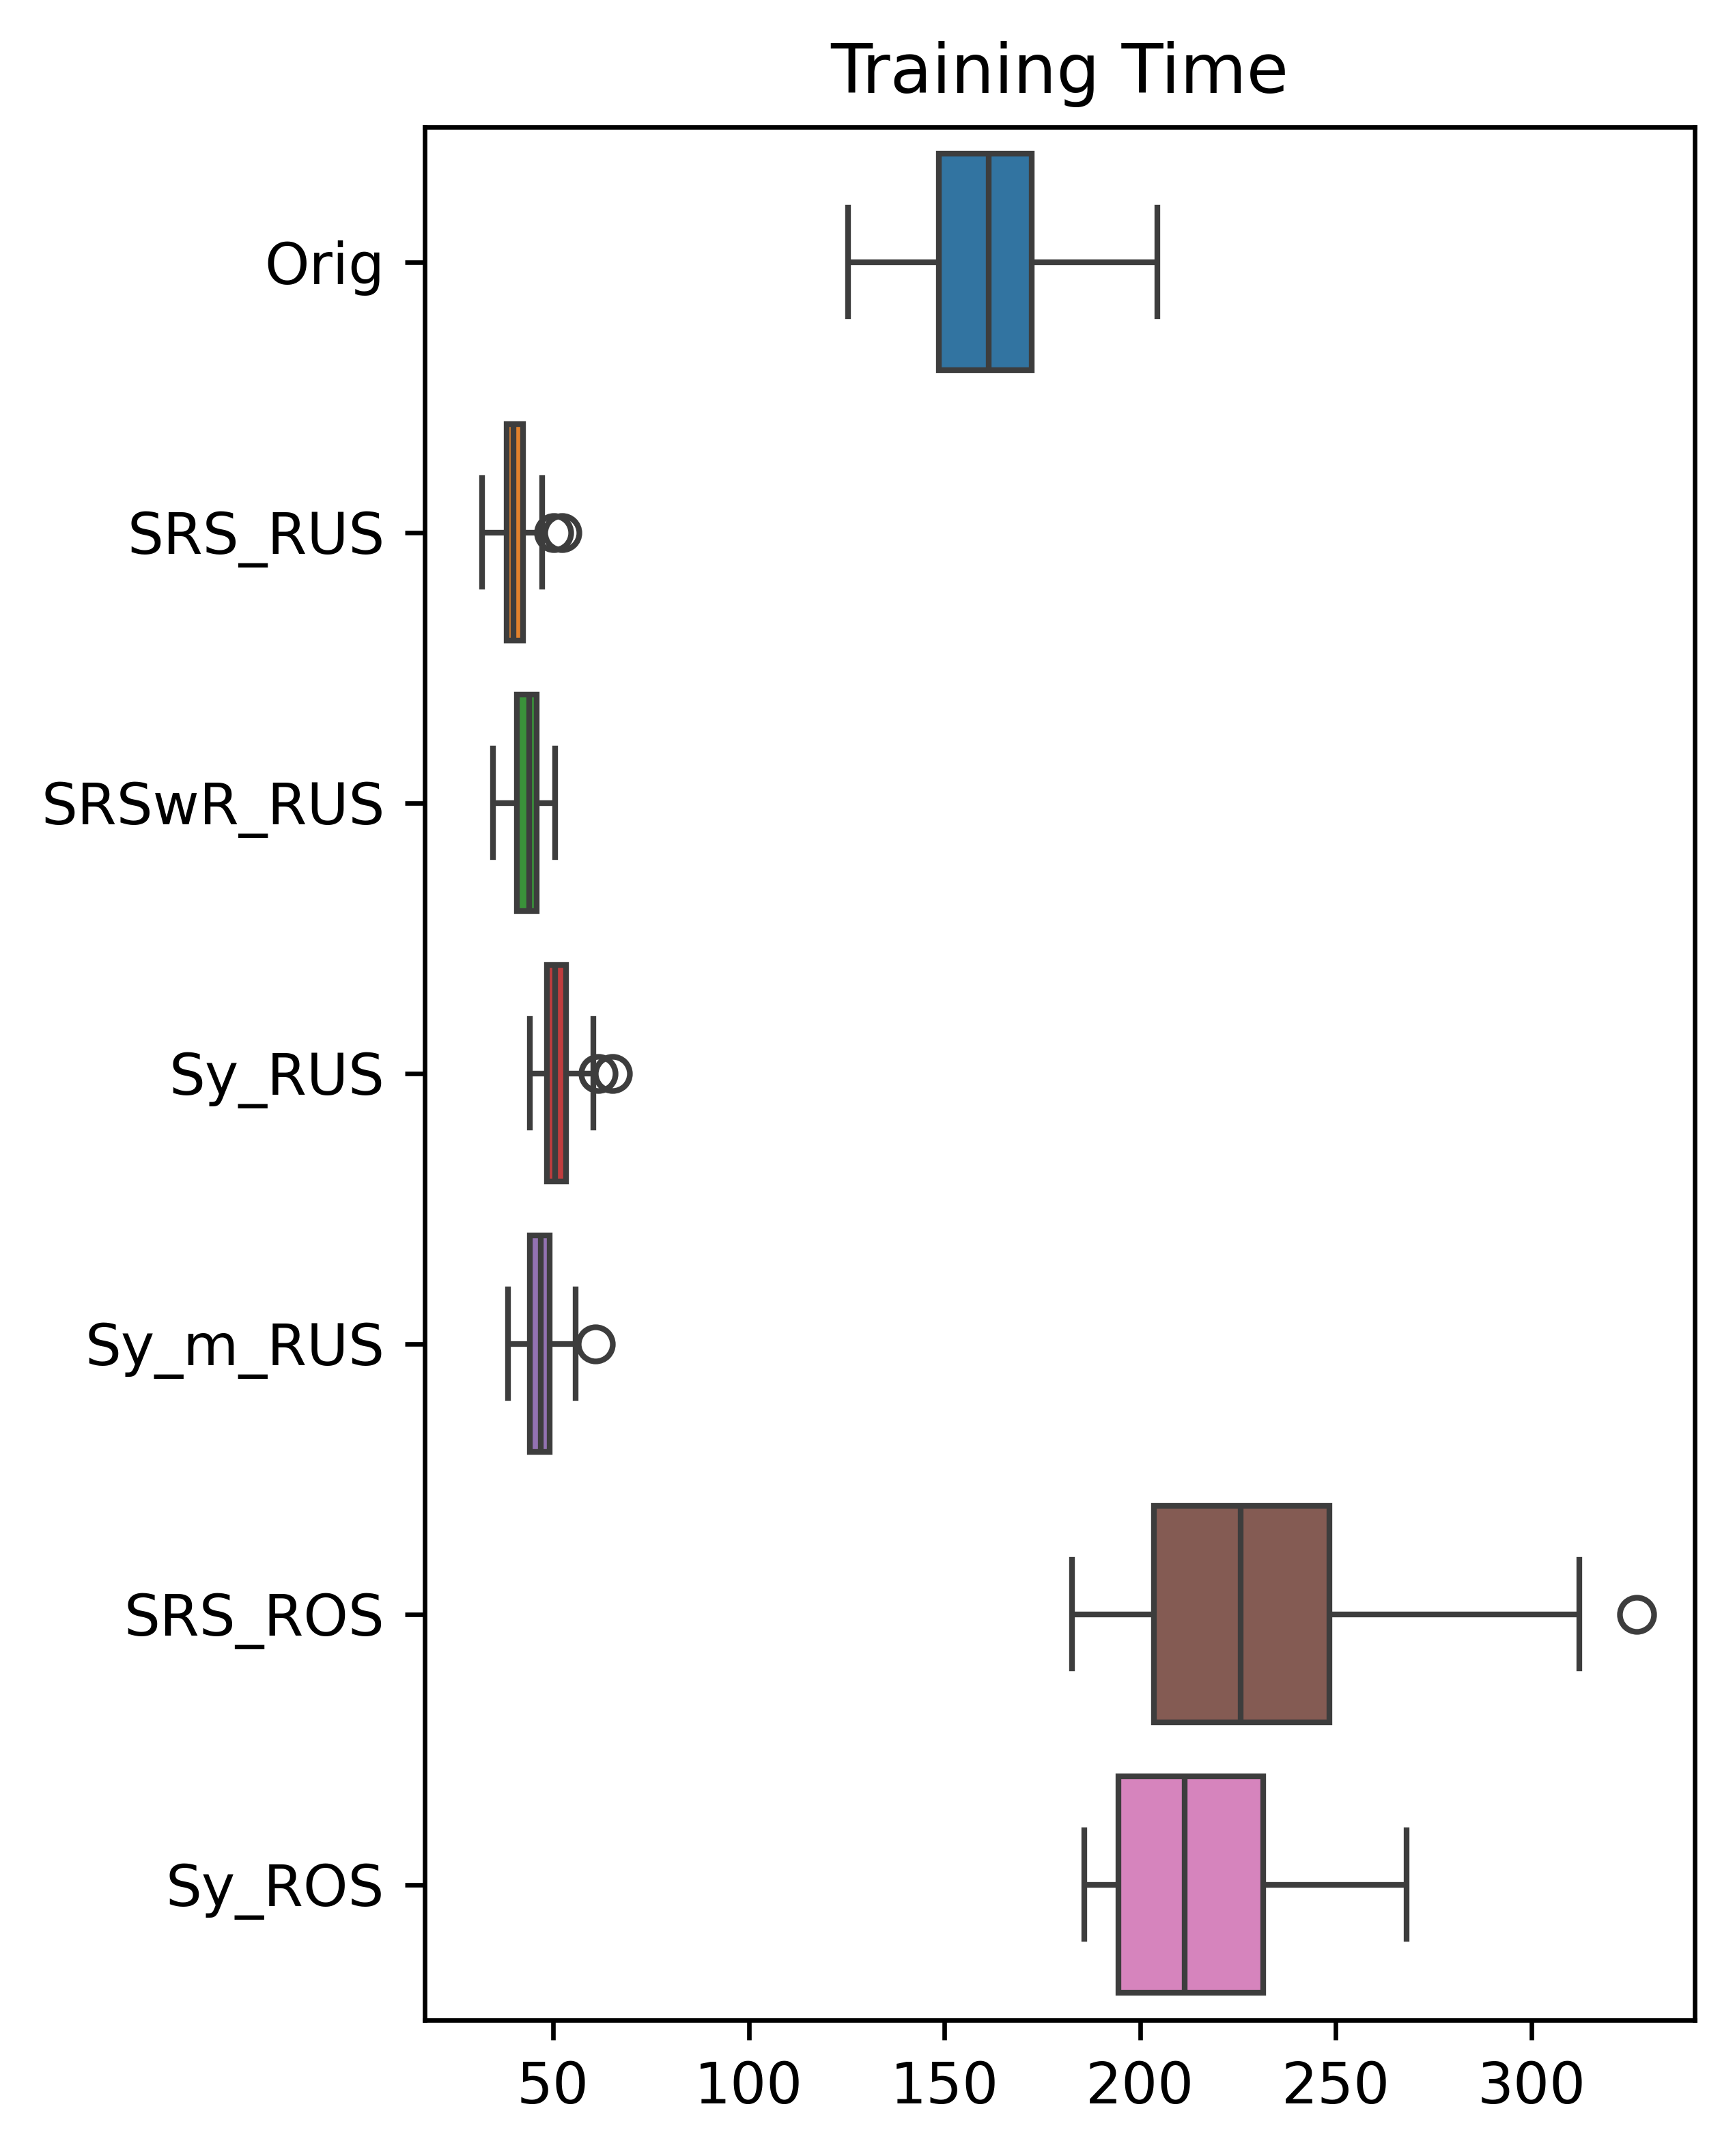

In [64]:
dataset = DF

plt.figure(figsize=(4,6), dpi=600)
plt.title('Training Time')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')